In [24]:
!pip install kaggle
!python -m pip install 'fsspec>=0.3.3'

     |████████████████████████████████| 136 kB 4.3 MB/s 


In [ ]:
#upload the credentials of the kaggle account
from google.colab import files
files.upload()

In [17]:
# before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [18]:
!kaggle datasets download -d corrieaar/apartment-rental-offers-in-germany

apartment-rental-offers-in-germany.zip: Skipping, found more recently modified local copy (use --force to force download)


In [19]:
!ls


 apartment-rental-offers-in-germany.zip  'kaggle (1).json'   sample_data
 files					  kaggle.json


In [20]:
# Extract the data
import zipfile
zip_ref = zipfile.ZipFile('apartment-rental-offers-in-germany.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [27]:
import pandas as pd
import dask
import numpy as np
from dask.dataframe import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
# Import the relevant files
df = pd.read_csv('/content/files/immo_data.csv')
from dask.dataframe import from_pandas
ddf = from_pandas(df, npartitions=3)

In [131]:
ddf.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


1 - 4 - 5

In [240]:
df=ddf.compute()

In [241]:
df.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [243]:
df.isnull().sum()

regio1                           0
serviceCharge                 6909
heatingType                  44856
telekomTvOffer               32619
telekomHybridUploadSpeed    223830
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
scoutId                          0
noParkSpaces                175798
firingTypes                  56964
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57045
baseRent                         0
houseNumber                  71018
livingSpace                      0
geo_krs                          0
condition                    68489
interiorQual                112665
petsAllowed                 114573
street                           0
streetPlain                  71013
lift                

In [244]:
(df.isna().sum()/len(df)).sort_values(ascending=False)

telekomHybridUploadSpeed    0.832546
electricityKwhPrice         0.825754
electricityBasePrice        0.825754
energyEfficiencyClass       0.710668
lastRefurbish               0.699792
heatingCosts                0.681912
noParkSpaces                0.653889
petsAllowed                 0.426160
interiorQual                0.419063
thermalChar                 0.396154
numberOfFloors              0.363519
houseNumber                 0.264155
streetPlain                 0.264136
condition                   0.254748
yearConstructed             0.212182
yearConstructedRange        0.212182
firingTypes                 0.211880
facilities                  0.196853
floor                       0.190846
heatingType                 0.166844
totalRent                   0.150705
typeOfFlat                  0.136187
telekomUploadSpeed          0.124077
telekomTvOffer              0.121328
description                 0.073450
serviceCharge               0.025698
pricetrend                  0.006814
r

In [245]:
df = df.drop(columns=df.columns[((df.isna().sum()/len(df)) > 0.50)])

In [246]:
df.duplicated().sum()

0

In [247]:
df.dropna(subset=['totalRent'],inplace=True)

In [248]:
print(df[df['totalRent'] == 0.0].shape[0])
df = df.drop(df[df['totalRent'] == 0.0].index)

236


In [249]:
print(df[df['livingSpace'] == 0.0].shape[0])
df = df.drop(df[df['livingSpace'] == 0.0].index)

53


In [250]:
df = df.drop(columns=['description','street','facilities','livingSpaceRange','scoutId','streetPlain','houseNumber','date','geo_bln'])

In [251]:
df.fillna(df._get_numeric_data().mean(),inplace = True)

In [252]:
%%time

for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
        upper_range = df[cols].mean() + 3 * df[cols].std()
        lower_range = df[cols].mean() - 3 * df[cols].std()
        indexs = df[(df[cols] > upper_range) | (df[cols] < lower_range)].index
        df = df.drop(indexs)

CPU times: user 784 ms, sys: 11.4 ms, total: 795 ms
Wall time: 795 ms


In [253]:
%%time

for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        df[cols].fillna(df[cols].value_counts().head(1).index[0],inplace = True)

CPU times: user 334 ms, sys: 5.58 ms, total: 340 ms
Wall time: 342 ms


In [254]:
df.isnull().sum()

regio1                  0
serviceCharge           0
heatingType             0
telekomTvOffer          0
newlyConst              0
balcony                 0
picturecount            0
pricetrend              0
telekomUploadSpeed      0
totalRent               0
yearConstructed         0
firingTypes             0
hasKitchen              0
cellar                  0
yearConstructedRange    0
baseRent                0
livingSpace             0
geo_krs                 0
condition               0
interiorQual            0
petsAllowed             0
lift                    0
baseRentRange           0
typeOfFlat              0
geo_plz                 0
noRooms                 0
thermalChar             0
floor                   0
numberOfFloors          0
noRoomsRange            0
garden                  0
regio2                  0
regio3                  0
dtype: int64

In [255]:
%%time
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        if df[cols].nunique()>100:
          print (cols)

firingTypes
geo_krs
regio2
regio3
CPU times: user 173 ms, sys: 2.71 ms, total: 175 ms
Wall time: 178 ms


In [256]:
df = df.drop(columns=['firingTypes','geo_krs','regio2','regio3'])

In [257]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 215564 entries, 0 to 268848
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                215564 non-null  object 
 1   serviceCharge         215564 non-null  float64
 2   heatingType           215564 non-null  object 
 3   telekomTvOffer        215564 non-null  object 
 4   newlyConst            215564 non-null  bool   
 5   balcony               215564 non-null  bool   
 6   picturecount          215564 non-null  int64  
 7   pricetrend            215564 non-null  float64
 8   telekomUploadSpeed    215564 non-null  float64
 9   totalRent             215564 non-null  float64
 10  yearConstructed       215564 non-null  float64
 11  hasKitchen            215564 non-null  bool   
 12  cellar                215564 non-null  bool   
 13  yearConstructedRange  215564 non-null  float64
 14  baseRent              215564 non-null  float64
 15  

2

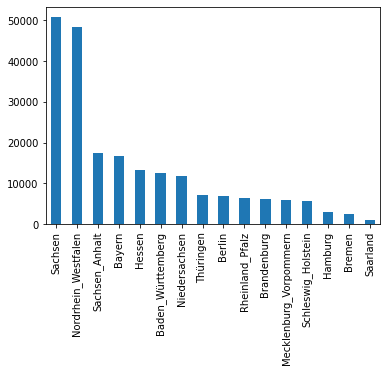

In [258]:
df['regio1'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



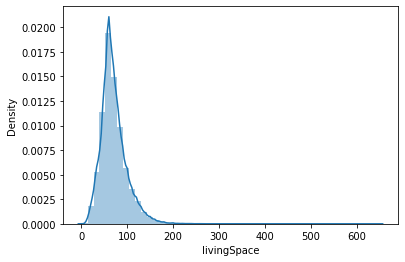

In [259]:
sns.distplot(df['livingSpace'],kde_kws={"label": 'livingSpace'})

In [260]:
import plotly.express
rm = df.groupby(['regio1'])['totalRent'].mean().sort_index()
fig = plotly.express.histogram(x = df['regio1'].value_counts().sort_index().index,
                   y = rm)
fig.update_xaxes(title="City")
fig.update_yaxes(title = "Average rental per month")
fig.show()

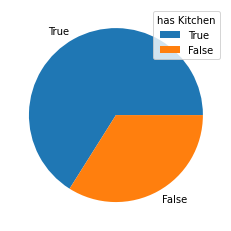

In [261]:
plt.pie(df['hasKitchen'].value_counts(),labels = ['True','False']);
plt.legend(title = "has Kitchen")

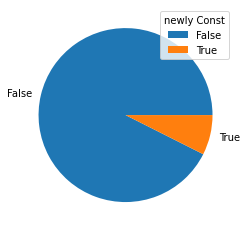

In [262]:
plt.pie(df['newlyConst'].value_counts(),labels = ['False','True']);
plt.legend(title = "newly Const")

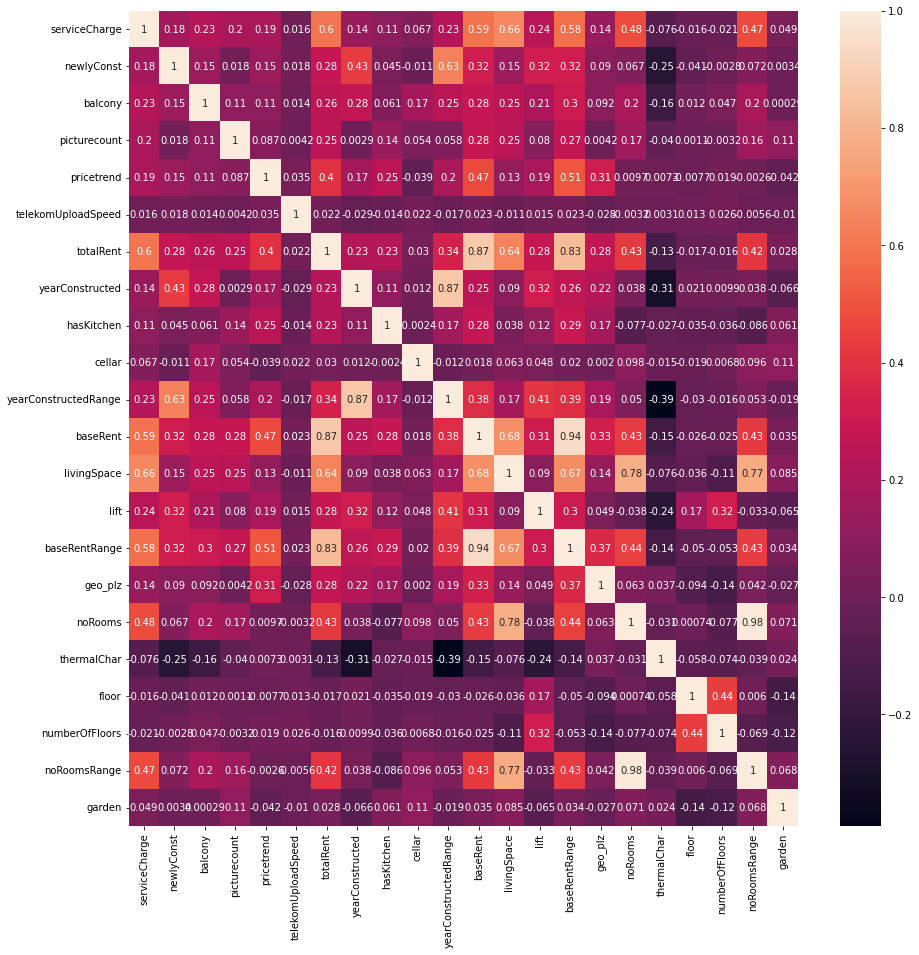

In [265]:
corr = df.corr()
plt.subplots(figsize=(15, 15))
sns.heatmap(corr,annot = True)

3

In [266]:
cat_cols = []
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        cat_cols.append(cols)

In [267]:
df = pd.concat([df, pd.get_dummies(df[cat_cols])], axis=1)
df = df.drop(columns=cat_cols)

In [268]:
from sklearn.model_selection import train_test_split
X = df.drop('totalRent',axis=1)
Y=df['totalRent']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [269]:
%%time
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

CPU times: user 1.89 s, sys: 135 ms, total: 2.02 s
Wall time: 1.16 s


In [270]:
from sklearn.metrics import mean_absolute_error
y_pred=reg.predict(X_test)
mean_absolute_error(y_test, y_pred)

27.392652528023227

In [272]:
from sklearn.feature_selection import RFE
rfe_selector = RFE(estimator=LinearRegression())
rfe_selector.fit(X_train, y_train)
rfe_selector.get_support()
new_cols=X_train.columns[rfe_selector.get_support()]

In [277]:
X_train.shape[1],new_cols.shape

(74, (37,))

In [294]:
new_cols

['baseRentRange',
 'noRooms',
 'regio1_Baden_Württemberg',
 'regio1_Berlin',
 'regio1_Brandenburg',
 'regio1_Bremen',
 'regio1_Hamburg',
 'regio1_Niedersachsen',
 'regio1_Nordrhein_Westfalen',
 'regio1_Rheinland_Pfalz',
 'regio1_Schleswig_Holstein',
 'regio1_Thüringen',
 'heatingType_central_heating',
 'heatingType_combined_heat_and_power_plant',
 'heatingType_district_heating',
 'heatingType_electric_heating',
 'heatingType_floor_heating',
 'heatingType_night_storage_heater',
 'heatingType_self_contained_central_heating',
 'heatingType_solar_heating',
 'heatingType_stove_heating',
 'heatingType_wood_pellet_heating',
 'telekomTvOffer_NONE',
 'condition_first_time_use',
 'condition_fully_renovated',
 'condition_mint_condition',
 'condition_need_of_renovation',
 'condition_refurbished',
 'condition_ripe_for_demolition',
 'condition_well_kept',
 'interiorQual_luxury',
 'interiorQual_simple',
 'petsAllowed_no',
 'typeOfFlat_half_basement',
 'typeOfFlat_other',
 'typeOfFlat_penthouse',
 'ty

In [292]:
new_cols=list(new_cols)
all_cols=list(X_train.columns)
z = list(set(all_cols) - set(new_cols))

In [295]:
X_train=X_train.drop(columns=list(z))
X_test=X_test.drop(columns=list(z))

In [296]:
reg = LinearRegression().fit(X_train, y_train)
y_pred=reg.predict(X_test)
mean_absolute_error(y_test, y_pred)

97.84409214099303